<a href="https://colab.research.google.com/github/dhruv354/horse-or-human/blob/main/horse_or_human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#download the dataset  for humans ans horse
!curl https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  142M  100  142M    0     0  85.3M      0  0:00:01  0:00:01 --:--:-- 85.3M
curl: (3) <url> malformed


In [2]:
#unzip the downloaded data
#training data
import zipfile
!mkdir horse_or_human
with zipfile.ZipFile('/content/horse-or-human.zip', 'r') as zf:
  zf.extractall('./horse_or_human')

In [3]:
#downloading validation dataset
!curl https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/horse-or-human_valid.zip 
!mkdir validation_data
with zipfile.ZipFile('/content/validation-horse-or-human.zip', 'r') as zf:
  zf.extractall('/content/validation_data')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.9M  100 10.9M    0     0  20.5M      0 --:--:-- --:--:-- --:--:-- 20.5M
curl: (3) <url> malformed


In [4]:
!ls
#check current files in the directory


horse_or_human	    sample_data      validation-horse-or-human.zip
horse-or-human.zip  validation_data


In [5]:
glob.glob?


Object `glob.glob` not found.


<Figure size 1080x1080 with 0 Axes>

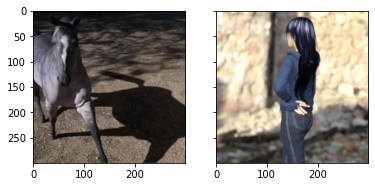

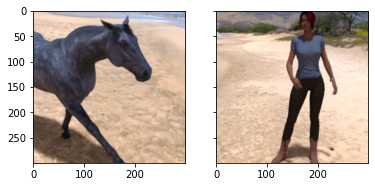

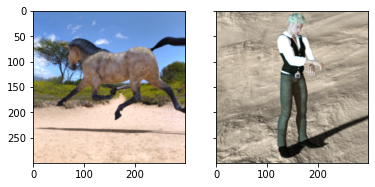

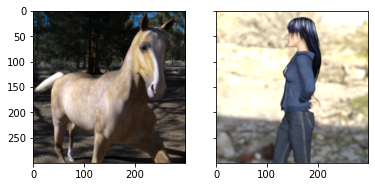

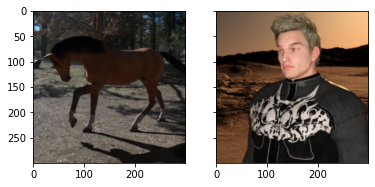

In [6]:
#looking at horse and human images side by side
import os
import glob
import matplotlib.pyplot as plt
horse_url = '/content/horse_or_human/horses'
human_url = '/content/horse_or_human/humans'

#display some of the images
horse_images = glob.glob(horse_url + '/' + '*')
human_images = glob.glob(human_url + '/' + '*')

fig = plt.figure(figsize=(15, 15))
for i, (horseImage, humanImage) in enumerate(zip(horse_images[:5], human_images[:5])):
  _, (ax1 ,ax2) = plt.subplots(1, 2, sharey=True)
  image1 = plt.imread(horseImage)
  ax1.imshow(image1)
  image2 = plt.imread(humanImage)
  ax2.imshow(image2)

In [7]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [9]:

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
#resize images to the same size and use augmentation to generalize the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/horse_or_human',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [11]:
!ls

horse_or_human	    sample_data      validation-horse-or-human.zip
horse-or-human.zip  validation_data


In [12]:
valid_datagen = ImageDataGenerator(rescale=1/255)

valid_generator = valid_datagen.flow_from_directory(
        '/content/validation_data',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 256 images belonging to 2 classes.


In [13]:
history = model.fit(
      train_generator,
      validation_data=valid_generator,
      steps_per_epoch=8,  
      epochs=15)

Epoch 1/15
8/8 [==============================] - 44s 2s/step - loss: 0.7000 - accuracy: 0.5379 - val_loss: 0.6864 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 15s 2s/step - loss: 0.6856 - accuracy: 0.5482 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 15s 2s/step - loss: 0.6660 - accuracy: 0.5480 - val_loss: 0.7198 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 15s 2s/step - loss: 0.5563 - accuracy: 0.7106 - val_loss: 0.9750 - val_accuracy: 0.7031
Epoch 5/15
8/8 [==============================] - 13s 2s/step - loss: 0.4988 - accuracy: 0.7434 - val_loss: 0.8194 - val_accuracy: 0.6992
Epoch 6/15
8/8 [==============================] - 13s 2s/step - loss: 0.4807 - accuracy: 0.7519 - val_loss: 1.1218 - val_accuracy: 0.6562
Epoch 7/15
8/8 [==============================] - 13s 2s/step - loss: 0.4555 - accuracy: 0.7818 - val_loss: 0.8524 - val_accuracy: 0.7578
Epoch 8/15
8/8 [==================